In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [5]:
# Import Data -  
df = pd.read_csv('D:\\SimpliLearn\\Machine Learning\\Assisted Practice\\Lesson 7\\AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [6]:
df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


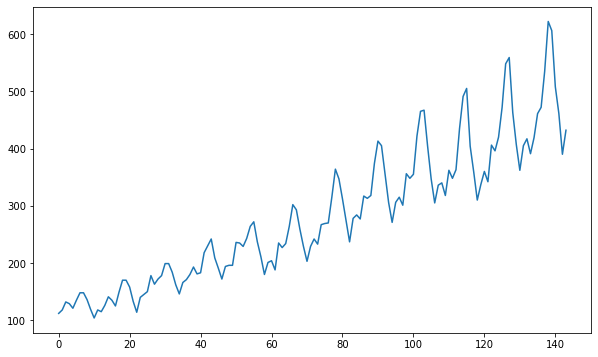

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(df['#Passengers'])

In [10]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(df['#Passengers'], model='multiplicative',freq=1)

# Additive Decomposition
add_result = seasonal_decompose(df['#Passengers'], model='additive',freq=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

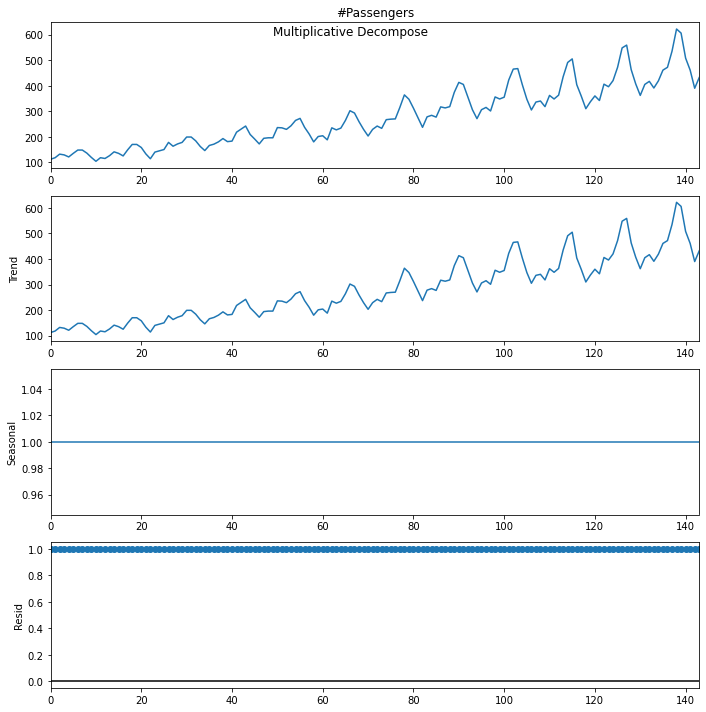

In [11]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)


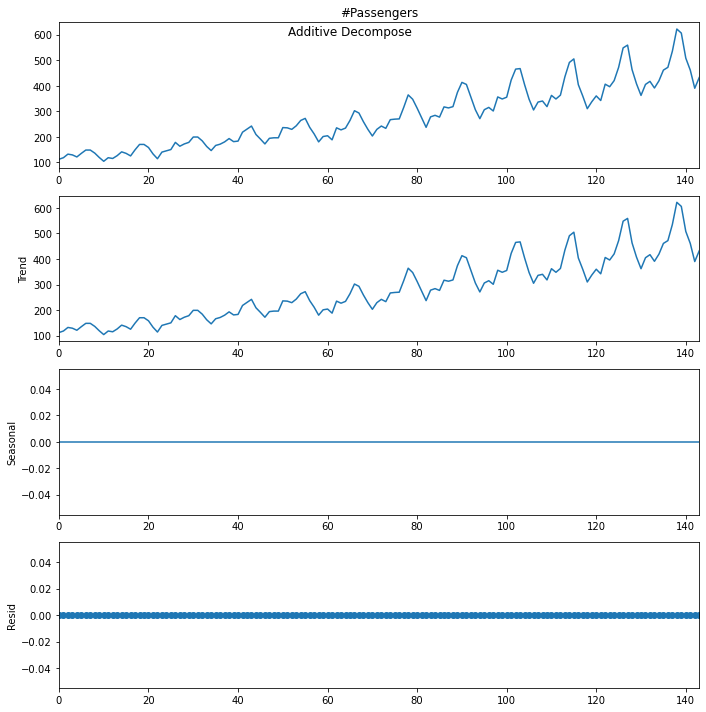

In [13]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

# ADFULLER TEST FOR STATIONARITY

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(df['#Passengers'].values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598
